<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP2/TP2_INICIAL_Tincho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia y Tecnología - TP N° 2**

# Análisis de redes y grafos

In [56]:
!pip install networkx powerlaw community

In [57]:
# Para visuzalización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx
import community
import powerlaw

from sklearn.metrics import adjusted_rand_score
import glob

In [58]:
# Descomprimo el ZIP
!unzip DataSujetos.zip

Archive:  DataSujetos.zip
replace DataSujetos/N1_suj1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [71]:
# genero 4 vectores con los nombres de los archivos por estadio
N1_csv = glob.glob('DataSujetos/N1_*.csv')
N2_csv = glob.glob('DataSujetos/N2_*.csv')
N3_csv = glob.glob('DataSujetos/N3_*.csv')
W_csv = glob.glob('DataSujetos/W_*.csv')

In [72]:
def calcula_umbral_posicion(matriz, num):

  matriz2= np.copy(matriz)
  vec_matriz= matriz2.flatten()
  vec_matriz= np.sort(vec_matriz)

  umbral= vec_matriz[num]

  matriz2[matriz2<=umbral] = 0
  matriz2[matriz2>umbral] = 1

  return matriz2
  
def calcula_umbral_porcentaje(matriz, porc):

  matriz2= np.copy(matriz)
  vec_matriz= matriz2.flatten()
  vec_matriz= np.sort(vec_matriz)


  umbral= (max(vec_matriz) - min(vec_matriz))*(1- porc) + min(vec_matriz)

  matriz2[matriz2<=umbral] = 0
  matriz2[matriz2>umbral] = 1

  return matriz2

### Tarea 1
Contamos con informacion de 18 personas.
Tenemos 1 matriz pesada por persona para 3 estadíos de sueño (N1, N2 y N3) y 1 para despierto (W)

In [73]:
# levantamos la primera matriz para el sujeto 1 para ver su forma
ws = pd.read_csv('/content/DataSujetos/N1_suj16.csv',sep=',',header=None)
# la matriz es de 116X116 correspondientes a las 116 regiones del cerebro descriptas en el archivo(aal_extended.csv)
# se trata de una matriz pesada

ws.shape

(116, 116)

In [74]:
ws

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.00000,0.95106,0.82987,0.648420,0.369220,0.455460,0.64883,0.61892,0.59474,0.491890,0.86439,0.86693,0.81605,0.83571,0.74101,0.74461,0.90990,0.90409,0.89639,0.90857,0.28924,0.147390,0.64572,0.537980,0.745520,0.621660,0.725230,0.681260,0.78844,0.75694,0.28411,0.34790,0.660810,0.508040,0.421590,0.277520,0.53413,0.49473,0.370240,0.580130,...,0.345780,0.333560,0.90802,0.87697,0.92007,0.91418,0.63903,0.632890,0.85904,0.87220,0.69330,0.769320,0.81631,0.84556,0.30577,0.25383,0.123160,0.42837,0.51492,0.48128,0.73346,0.72171,0.559600,0.669990,0.29825,0.463290,0.295870,0.535630,0.279180,0.42393,0.145450,0.098293,0.210560,0.55150,0.42769,0.51825,0.51073,0.68953,0.239160,0.271580
1,0.95106,1.00000,0.74142,0.598910,0.259500,0.337010,0.53667,0.53126,0.51170,0.387990,0.82824,0.83426,0.76544,0.78602,0.67063,0.69850,0.87503,0.90034,0.83581,0.87263,0.19109,0.062296,0.55883,0.485960,0.683030,0.580820,0.663550,0.607620,0.70179,0.69111,0.18493,0.26561,0.543310,0.402120,0.351330,0.223560,0.41670,0.35833,0.293220,0.489010,...,0.285980,0.295290,0.85853,0.88103,0.90322,0.91966,0.57846,0.595930,0.82730,0.84510,0.63067,0.765910,0.73352,0.77772,0.22507,0.15737,0.052315,0.30791,0.50501,0.49184,0.69446,0.66984,0.556570,0.603020,0.23401,0.346870,0.257620,0.427700,0.201290,0.34955,0.066629,-0.030776,0.203880,0.49793,0.34260,0.43434,0.46580,0.64771,0.153290,0.346000
2,0.82987,0.74142,1.00000,0.782610,0.667710,0.663580,0.87937,0.79998,0.80833,0.679300,0.80628,0.82573,0.88243,0.84341,0.84082,0.83870,0.78026,0.76314,0.88114,0.82880,0.34418,0.184840,0.85702,0.695620,0.810420,0.659930,0.813800,0.750530,0.76850,0.72935,0.42366,0.44613,0.752060,0.630340,0.505850,0.328800,0.51179,0.50710,0.344010,0.564830,...,0.356610,0.391900,0.81905,0.73969,0.78094,0.77034,0.68481,0.617900,0.87874,0.86991,0.75531,0.705190,0.89768,0.89903,0.50601,0.49412,0.301190,0.65193,0.45763,0.38078,0.68564,0.66526,0.570420,0.661430,0.47539,0.610540,0.435690,0.594230,0.357040,0.55710,0.243660,0.116030,0.101770,0.45335,0.43892,0.51198,0.49207,0.64230,0.347410,0.143390
3,0.64842,0.59891,0.78261,1.000000,0.684060,0.804610,0.69512,0.87197,0.65828,0.699040,0.56995,0.69826,0.65571,0.73974,0.67537,0.71048,0.60810,0.61091,0.70289,0.71569,0.51336,0.405710,0.88104,0.901610,0.777870,0.765270,0.802180,0.825220,0.62693,0.57890,0.63713,0.70993,0.753690,0.730480,0.663310,0.507790,0.51237,0.50532,0.259030,0.535900,...,0.346200,0.446040,0.64118,0.58558,0.59011,0.58630,0.46467,0.462480,0.72596,0.75006,0.56104,0.508630,0.71281,0.74208,0.67742,0.47789,0.622560,0.62138,0.32297,0.33578,0.53729,0.58157,0.546770,0.563510,0.67570,0.571820,0.619110,0.533010,0.476370,0.51945,0.411730,0.237680,0.029209,0.39465,0.48297,0.52397,0.49928,0.53013,0.395210,0.024704
4,0.36922,0.25950,0.66771,0.684060,1.000000,0.793410,0.78316,0.67251,0.85527,0.671840,0.40544,0.37893,0.55758,0.43006,0.55885,0.57161,0.39676,0.38437,0.53764,0.49193,0.26054,0.141660,0.70704,0.586520,0.475220,0.309950,0.539940,0.495920,0.50118,0.46110,0.47087,0.47214,0.661600,0.666010,0.392440,0.257270,0.23416,0.28503,0.059346,0.203410,...,0.441040,0.474300,0.48630,0.41140,0.35875,0.31777,0.42552,0.398430,0.47021,0.46770,0.42792,0.286720,0.56493,0.53917,0.60731,0.63799,0.493540,0.71861,0.17927,0.13914,0.37466,0.35273,0.437700,0.458870,0.51052,0.613730,0.500500,0.564100,0.270660,0.47669,0.313060,0.189090,-0.020909,0.23062,0.41122,0.39196,0.38857,0.41030,0.333470,0.025123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.51825,0.43434,0.51198,0

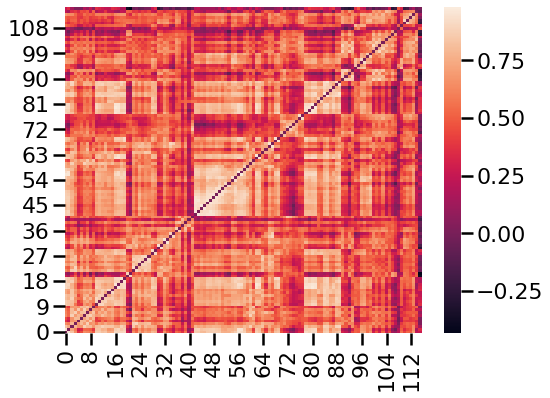

In [75]:
n = ws.shape[0]
ws -= np.diag(np.ones(n))

sns.heatmap(ws);
plt.xlim(0,n)
plt.ylim(0,n);

In [76]:
# vemos el contenido de uno de los vectores
N1_csv[1:10]

['DataSujetos/N1_suj12.csv',
 'DataSujetos/N1_suj15.csv',
 'DataSujetos/N1_suj14.csv',
 'DataSujetos/N1_suj9.csv',
 'DataSujetos/N1_suj4.csv',
 'DataSujetos/N1_suj18.csv',
 'DataSujetos/N1_suj3.csv',
 'DataSujetos/N1_suj2.csv',
 'DataSujetos/N1_suj1.csv']

In [77]:
# funcion para calcular las matrices promedio
def calcula_promedio(archivos):

  mat_prom = np.zeros((116, 116))

  for arch in archivos:
      # levanto los datos, los trasnformo a array 
      mat=pd.read_csv(arch,sep=',',header=None)
      
      mat = np.array(mat)
      # pongo unos en la diagonal
      # np.fill_diagonal(mat,1)

      # los voy sumando todos a mi matriz N1_prom
      mat_prom=mat_prom+mat
    
  # divido por el total de matrices para generar el promedio
  mat_prom = mat_prom/len(N1_csv)
  #return pd.DataFrame(mat_prom)
  return mat_prom


# calculo los promedios de todas las matrices
N1_prom= calcula_promedio(N1_csv)
N2_prom= calcula_promedio(N2_csv)
N3_prom= calcula_promedio(N3_csv)
W_prom= calcula_promedio(W_csv)


In [78]:
# vemos como quedaron
pd.DataFrame(N2_prom)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.837192,0.723992,0.714543,0.607531,0.588598,0.726177,0.733429,0.566370,0.571422,0.732387,0.690289,0.689967,0.658501,0.642363,0.603589,0.708004,0.679699,0.844637,0.811516,0.425428,0.385908,0.630849,0.580822,0.502332,0.495559,0.521666,0.526271,0.609496,0.577906,0.564755,0.550062,0.775318,0.754578,0.608618,0.566458,0.476872,0.450898,0.443878,0.492301,...,0.417335,0.414528,0.615594,0.615561,0.652863,0.639094,0.574348,0.586219,0.550783,0.507296,0.481553,0.458899,0.596389,0.579279,0.355669,0.386954,0.298197,0.373208,0.294684,0.248546,0.392774,0.348792,0.331354,0.376901,0.387750,0.376187,0.344158,0.305660,0.230335,0.286099,0.267853,0.148644,0.168361,0.337270,0.356179,0.379774,0.268125,0.351038,0.264919,0.020578
1,0.837192,1.000000,0.620606,0.671886,0.549683,0.528186,0.604064,0.655014,0.502421,0.502028,0.585194,0.616922,0.567233,0.572463,0.575456,0.554584,0.709144,0.758531,0.794182,0.863688,0.436407,0.391346,0.558281,0.509093,0.457758,0.466158,0.470409,0.465646,0.597976,0.614108,0.565711,0.541242,0.771714,0.773722,0.567582,0.552203,0.447927,0.446989,0.430791,0.500552,...,0.453691,0.465196,0.623697,0.676846,0.617689,0.626891,0.526423,0.570593,0.418980,0.428135,0.416064,0.405070,0.483383,0.485687,0.319995,0.338172,0.264994,0.328696,0.345050,0.311095,0.498292,0.379684,0.387043,0.367012,0.374449,0.328644,0.374776,0.278639,0.255776,0.277678,0.297457,0.165335,0.202535,0.364401,0.410777,0.425941,0.281234,0.398590,0.295995,0.005839
2,0.723992,0.620606,1.000000,0.865224,0.775811,0.721733,0.882504,0.781109,0.762259,0.700440,0.606006,0.570737,0.678346,0.619231,0.691309,0.631398,0.539323,0.528452,0.713862,0.648915,0.465021,0.407303,0.860509,0.804026,0.705701,0.679323,0.656308,0.651135,0.476444,0.459007,0.626023,0.609181,0.692942,0.648794,0.660261,0.599594,0.464816,0.445066,0.484497,0.516019,...,0.369864,0.361612,0.503263,0.495833,0.577571,0.587822,0.545939,0.547784,0.603254,0.562625,0.483963,0.498302,0.624359,0.625182,0.497484,0.506749,0.496167,0.544111,0.282568,0.236818,0.364589,0.315889,0.358164,0.387710,0.459897,0.462081,0.385405,0.348450,0.312342,0.373895,0.294999,0.154902,0.187770,0.297731,0.338849,0.351147,0.326451,0.347906,0.271008,0.014969
3,0.714543,0.671886,0.865224,1.000000,0.719022,0.730379,0.818658,0.871837,0.702252,0.737197,0.578214,0.640002,0.633115,0.684657,0.648976,0.676307,0.537080,0.544650,0.693844,0.679313,0.474111,0.427846,0.805272,0.833144,0.668576,0.696108,0.634564,0.664606,0.486457,0.506456,0.637786,0.657433,0.700537,0.688388,0.669949,0.643913,0.462891,0.467851,0.475541,0.529293,...,0.376702,0.380776,0.487132,0.487519,0.562621,0.590128,0.532512,0.564443,0.577009,0.601823,0.461751,0.503432,0.595389,0.637208,0.513721,0.469106,0.513955,0.500281,0.274013,0.236930,0.372722,0.305115,0.352899,0.365426,0.492484,0.435843,0.399882,0.325737,0.314871,0.354051,0.309283,0.166202,0.177324,0.291108,0.344164,0.343744,0.305265,0.310409,0.250319,0.012041
4,0.607531,0.549683,0.775811,0.719022,1.000000,0.811258,0.769678,0.707867,0.807494,0.734758,0.522022,0.500014,0.580579,0.525931,0.620728,0.557804,0.419829,0.431467,0.569198,0.541303,0.417360,0.348722,0.653743,0.622694,0.580284,0.527983,0.672925,0.618507,0.386020,0.380017,0.446657,0.429793,0.589729,0.551234,0.557390,0.535021,0.401331,0.410482,0.402334,0.451421,...,0.320594,0.324644,0.372751,0.383765,0.418712,0.431854,0.443941,0.456957,0.438850,0.417544,0.413126,0.397377,0.593134,0.607327,0.466716,0.454520,0.463292,0.483584,0.236683,0.184622,0.319346,0.248111,0.308767,0.334706,0.430465,0.429076,0.353918,0.308873,0.234651,0.286534,0.293971,0.156409,0.143407,0.255484,0.305470,0.324212,0.332988,0.315696,0.242698,0.007711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Text(0.5, 1.0, 'Promedios N1')

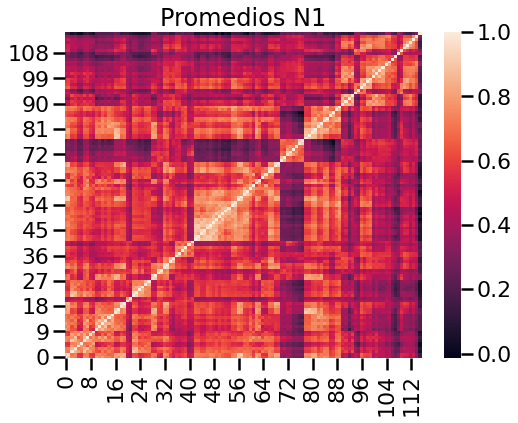

In [79]:
sns.heatmap(N1_prom)

plt.xlim(0,n)
plt.ylim(0,n)
plt.title ("Promedios N1")

Text(0.5, 1.0, 'Promedios N2')

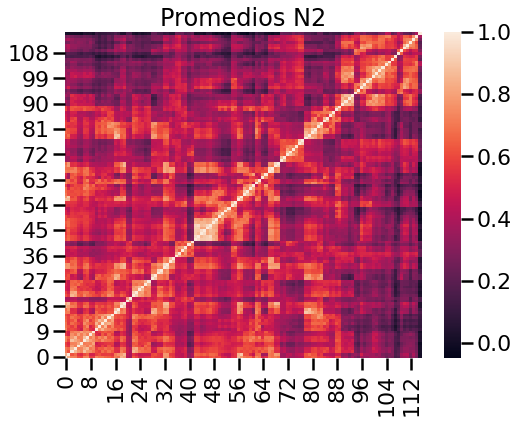

In [80]:
sns.heatmap(N2_prom)

plt.xlim(0,n)
plt.ylim(0,n)
plt.title ("Promedios N2")

Text(0.5, 1.0, 'Promedios N3')

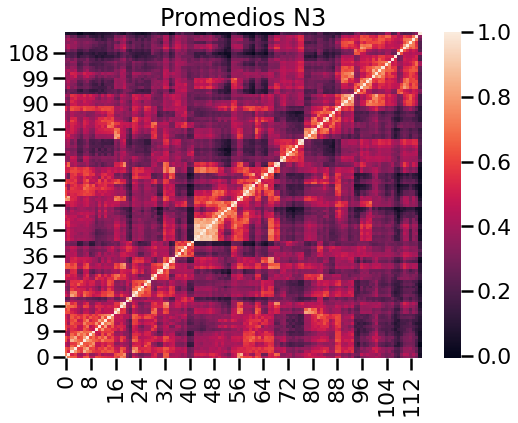

In [81]:
sns.heatmap(N3_prom)
plt.xlim(0,n)
plt.ylim(0,n)
plt.title ("Promedios N3")


Text(0.5, 1.0, 'Promedios W')

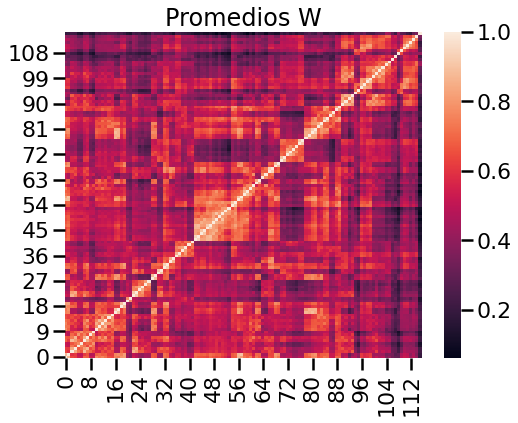

In [82]:
sns.heatmap(W_prom)
plt.xlim(0,n)
plt.ylim(0,n)
plt.title ("Promedios W")

In [83]:
MAT_N1_UMBRAL = calcula_umbral_porcentaje(N1_prom,0.25)
MAT_N2_UMBRAL = calcula_umbral_porcentaje(N2_prom,0.25)
MAT_N3_UMBRAL = calcula_umbral_porcentaje(N3_prom,0.25)
MAT_W_UMBRAL = calcula_umbral_porcentaje(W_prom,0.25)

In [118]:
pd.DataFrame(N1_prom)
# pd.DataFrame(MAT_N1_UMBRAL)
# pd.DataFrame(N2_prom)
# pd.DataFrame(MAT_N2_UMBRAL)
# pd.DataFrame(N3_prom)
# pd.DataFrame(MAT_N3_UMBRAL)
# pd.DataFrame(W_prom)
# pd.DataFrame(MAT_W_UMBRAL)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.904321,0.735057,0.723526,0.583049,0.561781,0.758981,0.735127,0.616454,0.575069,0.798199,0.741889,0.796870,0.729703,0.725438,0.688164,0.799044,0.764322,0.849991,0.815863,0.462332,0.365780,0.641368,0.620678,0.554219,0.546984,0.595826,0.614568,0.704503,0.662316,0.514237,0.471428,0.749762,0.684322,0.588193,0.505072,0.584542,0.533939,0.584192,0.617726,...,0.284393,0.243344,0.745783,0.725301,0.830978,0.824026,0.711716,0.730188,0.766596,0.751021,0.629226,0.643766,0.743592,0.753803,0.418929,0.488288,0.269370,0.433745,0.493879,0.430857,0.644284,0.599597,0.567273,0.607399,0.410305,0.502729,0.433733,0.472363,0.390682,0.447964,0.326236,0.275041,0.333900,0.535109,0.488681,0.483971,0.401715,0.479057,0.349738,0.158671
1,0.904321,1.000000,0.696327,0.736999,0.571637,0.549751,0.709039,0.733717,0.578979,0.558938,0.723089,0.752709,0.717012,0.713167,0.664749,0.673847,0.811242,0.825954,0.827089,0.853472,0.459610,0.367985,0.617328,0.612208,0.528532,0.545016,0.578540,0.593918,0.703590,0.701004,0.539663,0.507807,0.775787,0.733652,0.585885,0.522805,0.587843,0.565382,0.594246,0.638775,...,0.329038,0.312032,0.762412,0.766811,0.825954,0.838771,0.674980,0.725057,0.713167,0.725436,0.585156,0.609877,0.693244,0.723254,0.437581,0.471662,0.287685,0.422231,0.490846,0.456862,0.672863,0.609024,0.593846,0.604942,0.434351,0.484626,0.462586,0.468298,0.392686,0.438036,0.346351,0.282312,0.340845,0.536268,0.526147,0.510107,0.423120,0.511886,0.356228,0.151768
2,0.735057,0.696327,1.000000,0.863467,0.787321,0.720569,0.903822,0.763985,0.809697,0.698096,0.626762,0.609227,0.716488,0.650970,0.719406,0.664832,0.590357,0.594939,0.737369,0.666944,0.517589,0.419107,0.904726,0.849873,0.758462,0.737178,0.729962,0.701077,0.540223,0.533262,0.610132,0.599482,0.692215,0.624655,0.628975,0.530712,0.537168,0.500675,0.558182,0.586266,...,0.295499,0.263574,0.571846,0.571488,0.643250,0.666548,0.595309,0.629561,0.726386,0.708465,0.577475,0.619362,0.710089,0.739602,0.543347,0.585519,0.485778,0.621566,0.385777,0.298580,0.538484,0.479816,0.517110,0.556484,0.444853,0.558681,0.429604,0.458138,0.397008,0.442425,0.321995,0.243823,0.243093,0.397221,0.440448,0.444766,0.441407,0.422304,0.322304,0.050469
3,0.723526,0.736999,0.863467,1.000000,0.723804,0.743645,0.842917,0.892964,0.744762,0.743132,0.625271,0.696274,0.687060,0.733075,0.668633,0.715651,0.614962,0.629722,0.734532,0.717461,0.515362,0.458428,0.831008,0.872948,0.685676,0.742821,0.675180,0.694593,0.579985,0.599917,0.659532,0.686303,0.727107,0.707533,0.634327,0.583401,0.534052,0.531735,0.548344,0.589084,...,0.333826,0.338650,0.590976,0.597723,0.650580,0.679424,0.577462,0.638287,0.694320,0.714596,0.527138,0.568614,0.681863,0.727273,0.588289,0.545304,0.533672,0.551064,0.396819,0.326679,0.542108,0.471251,0.540630,0.538046,0.523107,0.527224,0.477276,0.442825,0.428241,0.431057,0.355737,0.263165,0.274479,0.423171,0.464159,0.447382,0.425683,0.423810,0.339419,0.090560
4,0.583049,0.571637,0.787321,0.723804,1.000000,0.792615,0.743912,0.648637,0.819362,0.711658,0.476791,0.480378,0.567964,0.527561,0.648246,0.587152,0.476584,0.485861,0.577368,0.553583,0.515914,0.425365,0.729651,0.703407,0.666939,0.610453,0.723078,0.660629,0.424320,0.436544,0.479758,0.472224,0.580057,0.531737,0.532924,0.465096,0.431838,0.421634,0.471289,0.483160,...,0.225997,0.200061,0.468703,0.462036,0.529566,0.544688,0.508353,0.547812,0.587046,0.583724,0.519539,0.534733,0.627295,0.644307,0.500955,0.522314,0.457026,0.548534,0.306271,0.214374,0.433992,0.354488,0.440587,0.469278,0.398539,0.511852,0.382927,0.418770,0.322322,0.367448,0.292212,0.214037,0.199547,0.316876,0.391484,0.391257,0.411443,0.377174,0.280599,0.022240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Text(0.5, 1.0, 'spring')

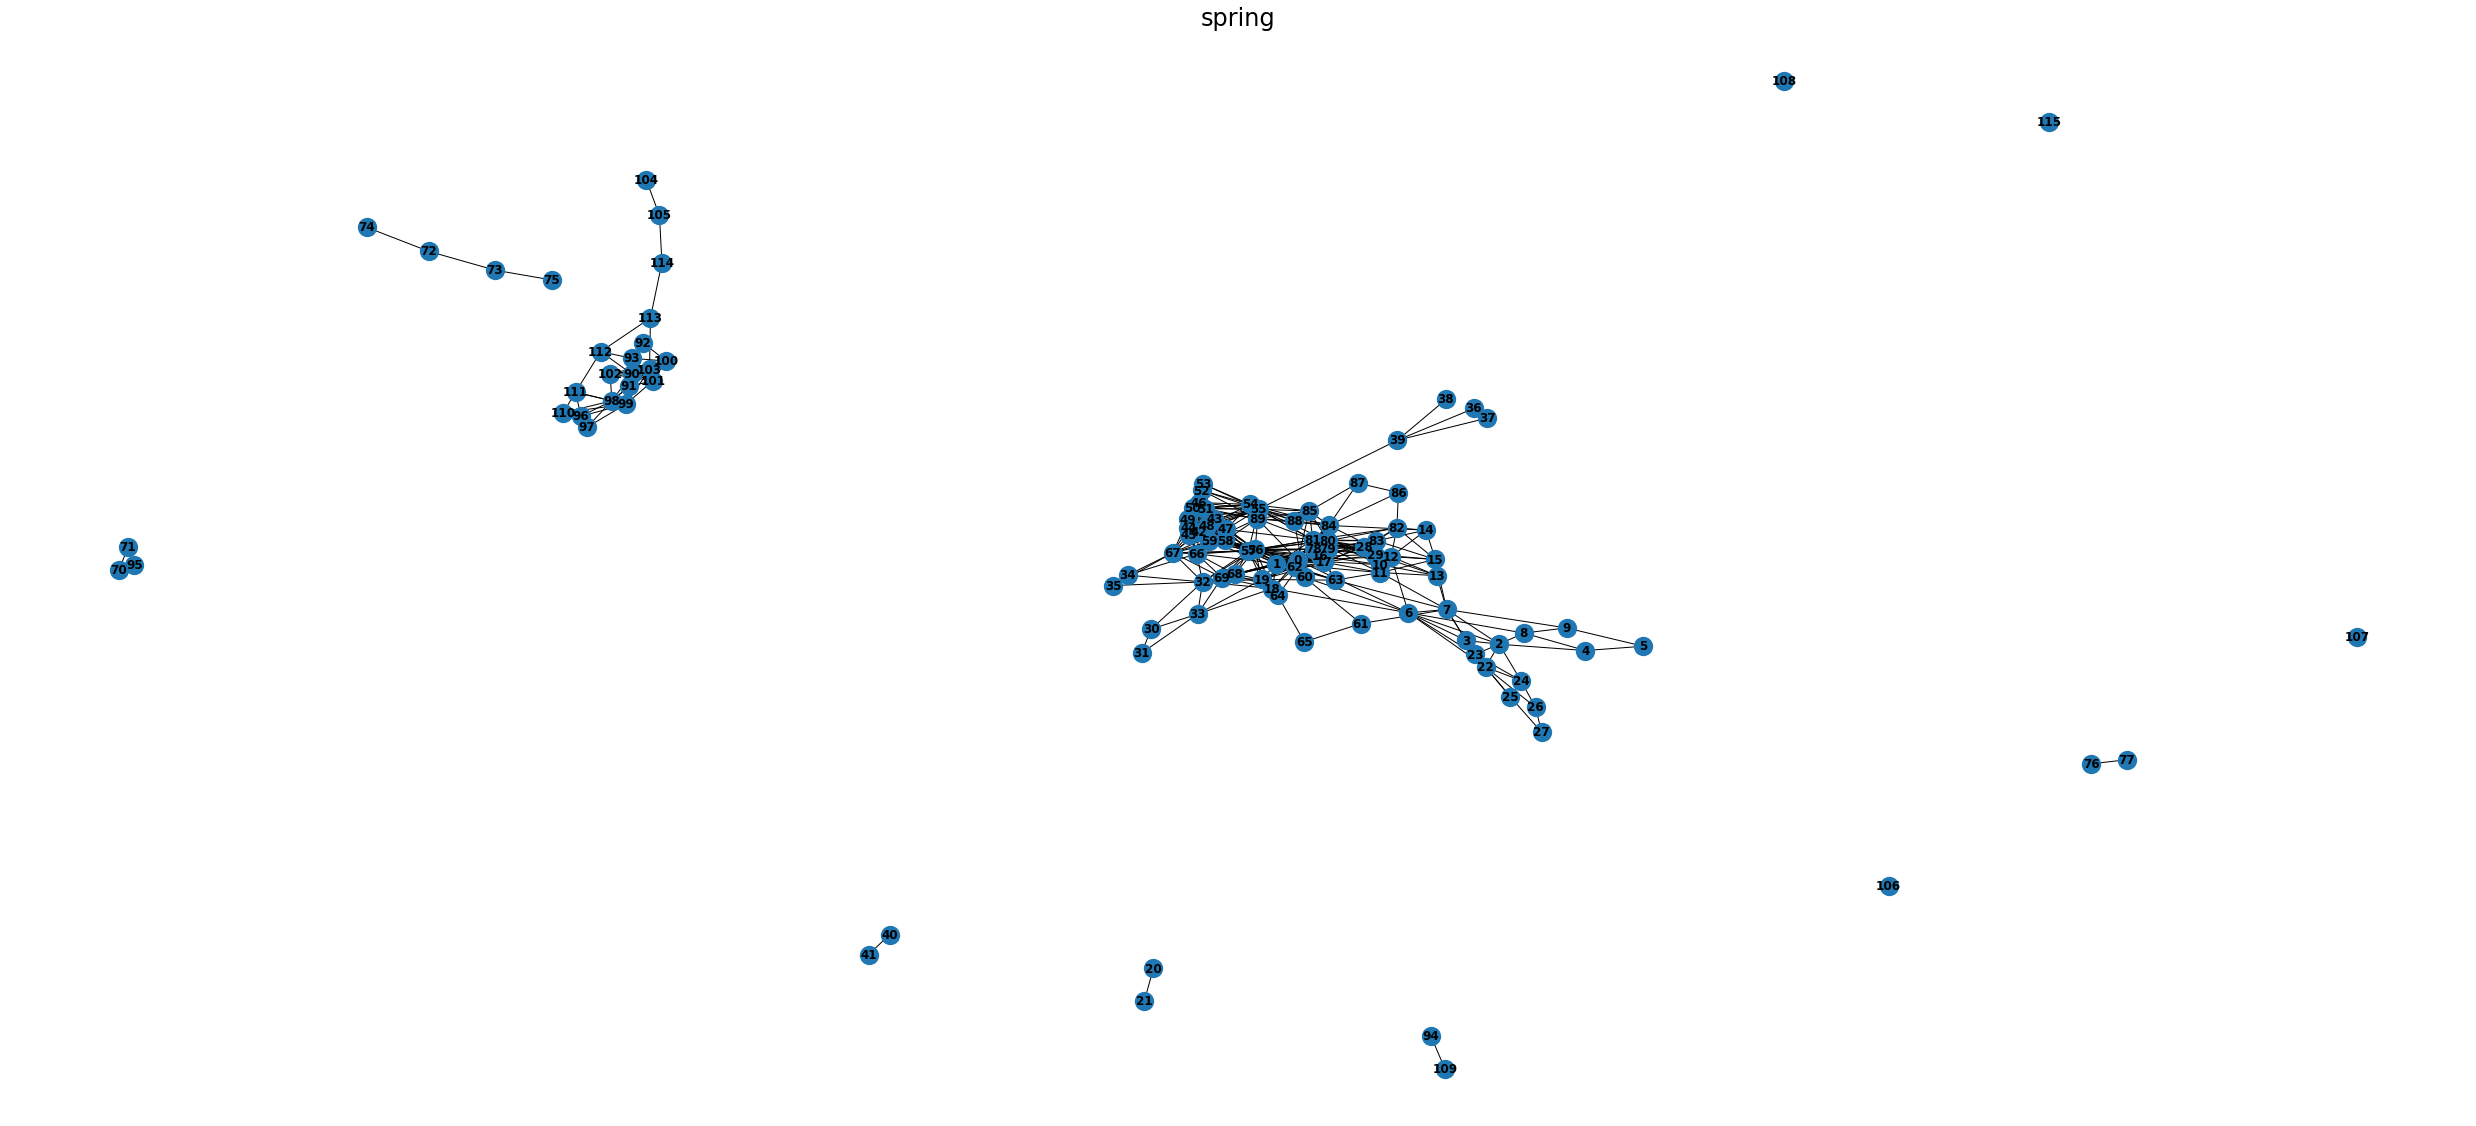

In [84]:
plt.figure(figsize=(150,20))

plt.subplot(131)
G_N1_UMBRAL = nx.from_numpy_matrix(MAT_N1_UMBRAL)
nx.draw(G_N1_UMBRAL, with_labels=True, font_weight='bold')
plt.title('spring')

#plt.subplot(132)
#layout=nx.fruchterman_reingold_layout(G_N1_25)
#nx.draw(G_N1_25,layout, with_labels=True, font_weight='bold')
#plt.title('fruchterman reingold')

#plt.subplot(133)
#layout=nx.circular_layout(G_N1_25)
#nx.draw(G_N1_25,layout, with_labels=True, font_weight='bold')
#plt.title('circular');

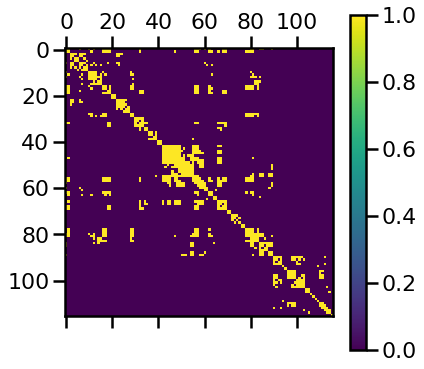

In [85]:
# calcula  el umbral por el porcentaje del parametro
plt.matshow(MAT_N1_UMBRAL)
plt.colorbar()

Text(0.5, 1.0, 'spring')

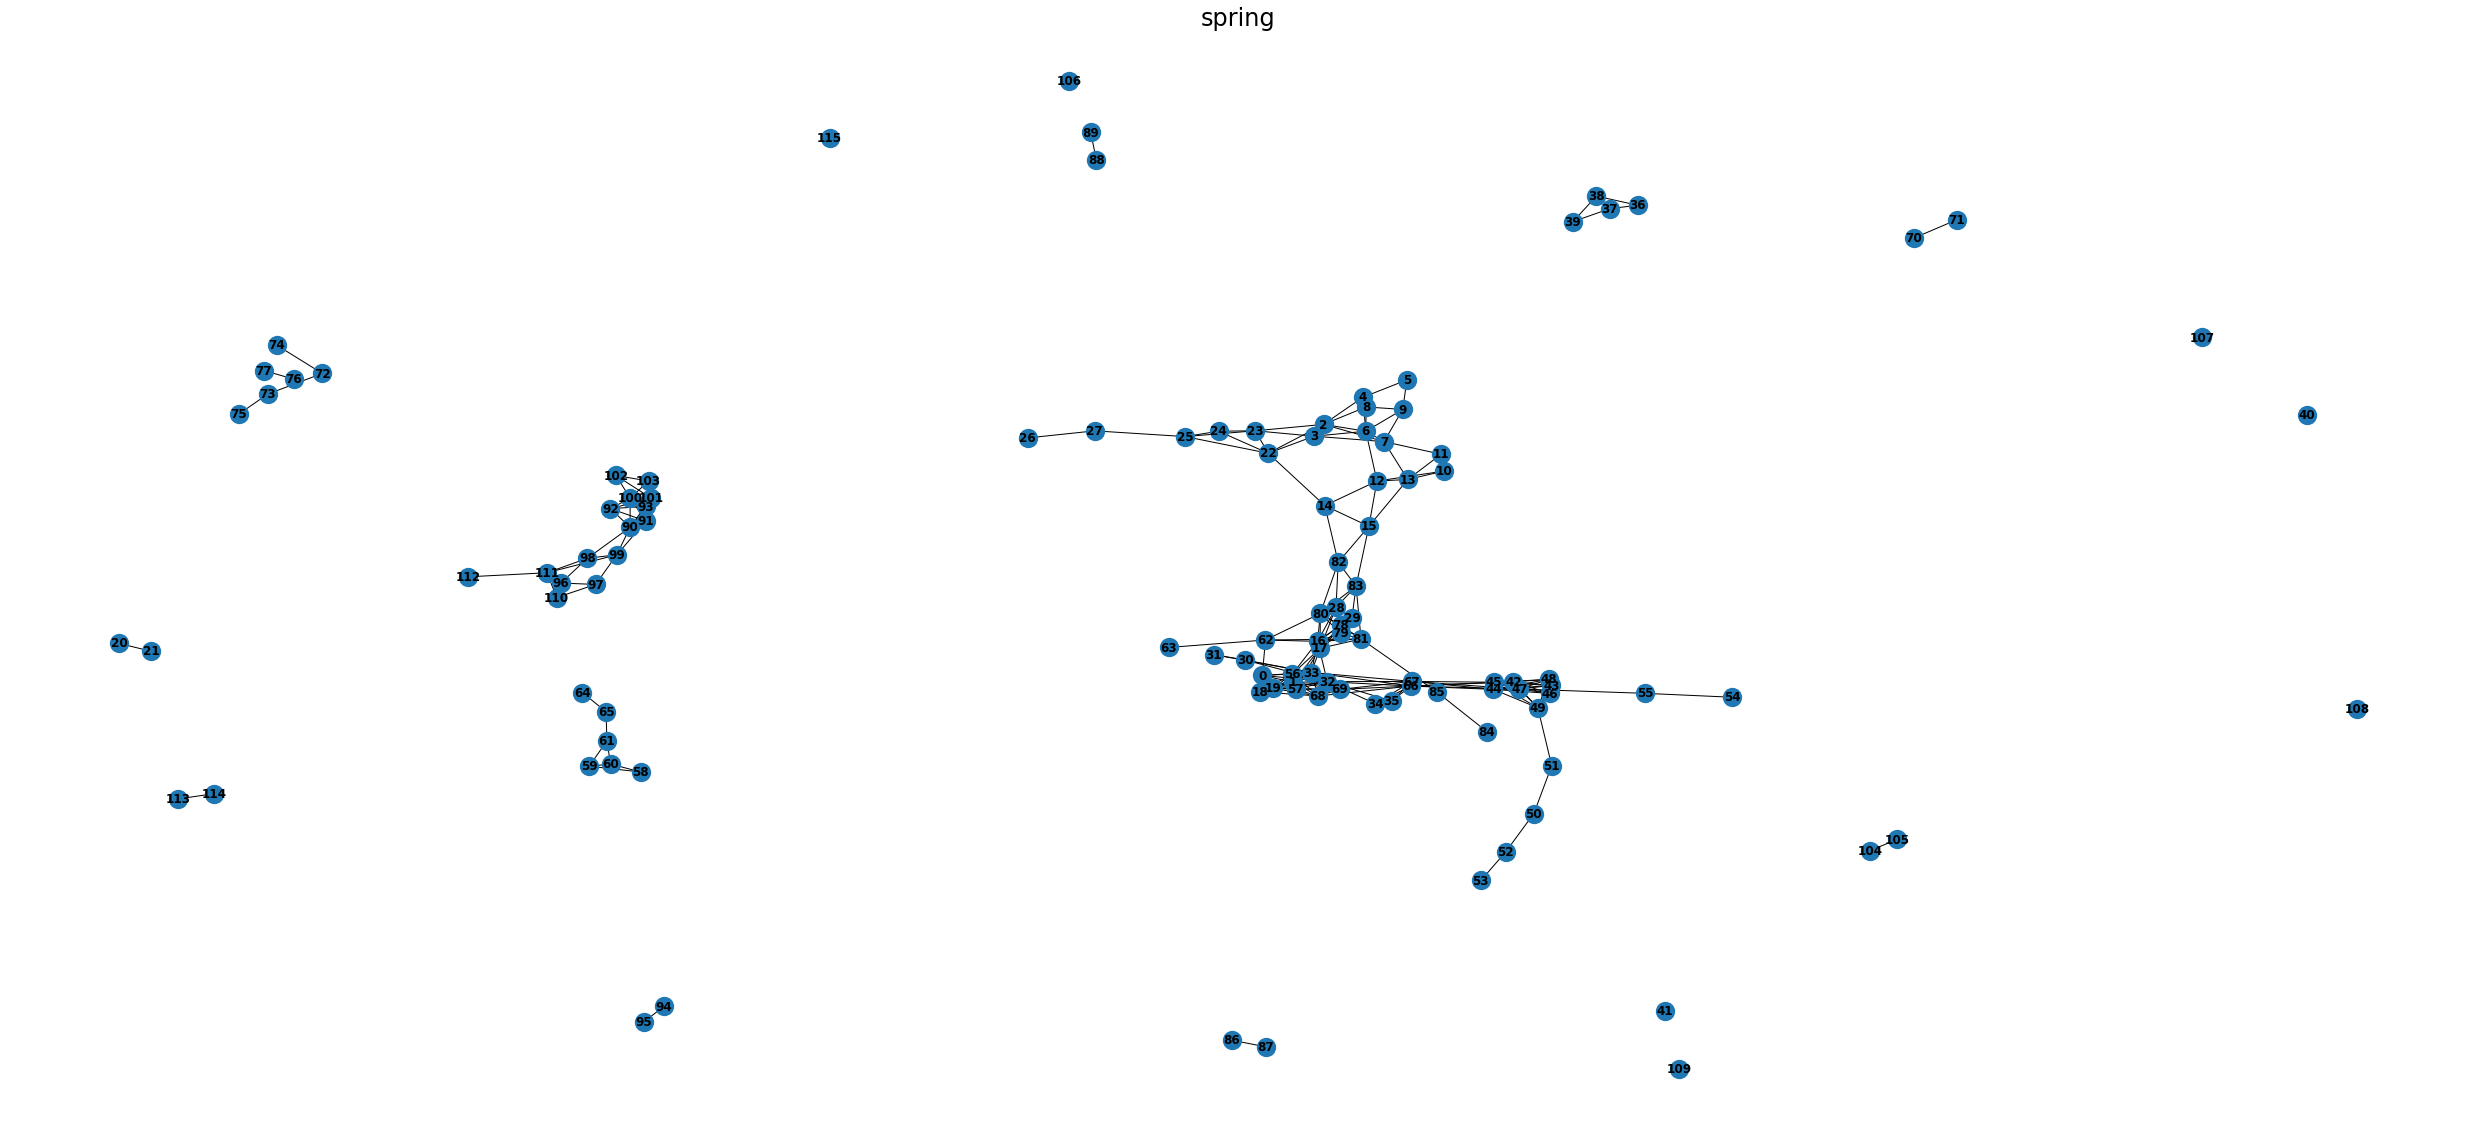

In [86]:
plt.figure(figsize=(150,20))
plt.subplot(131)
G_N2_UMBRAL = nx.from_numpy_matrix(MAT_N2_UMBRAL)
nx.draw(G_N2_UMBRAL, with_labels=True, font_weight='bold')
plt.title('spring')


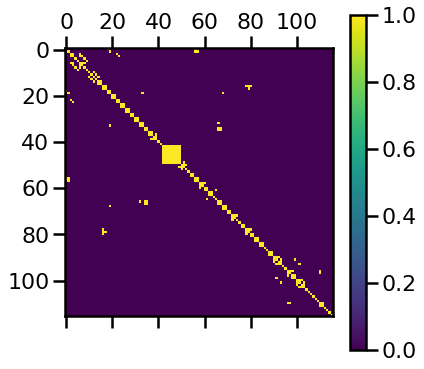

In [87]:
plt.matshow(MAT_N3_UMBRAL)
plt.colorbar()

Text(0.5, 1.0, 'spring')

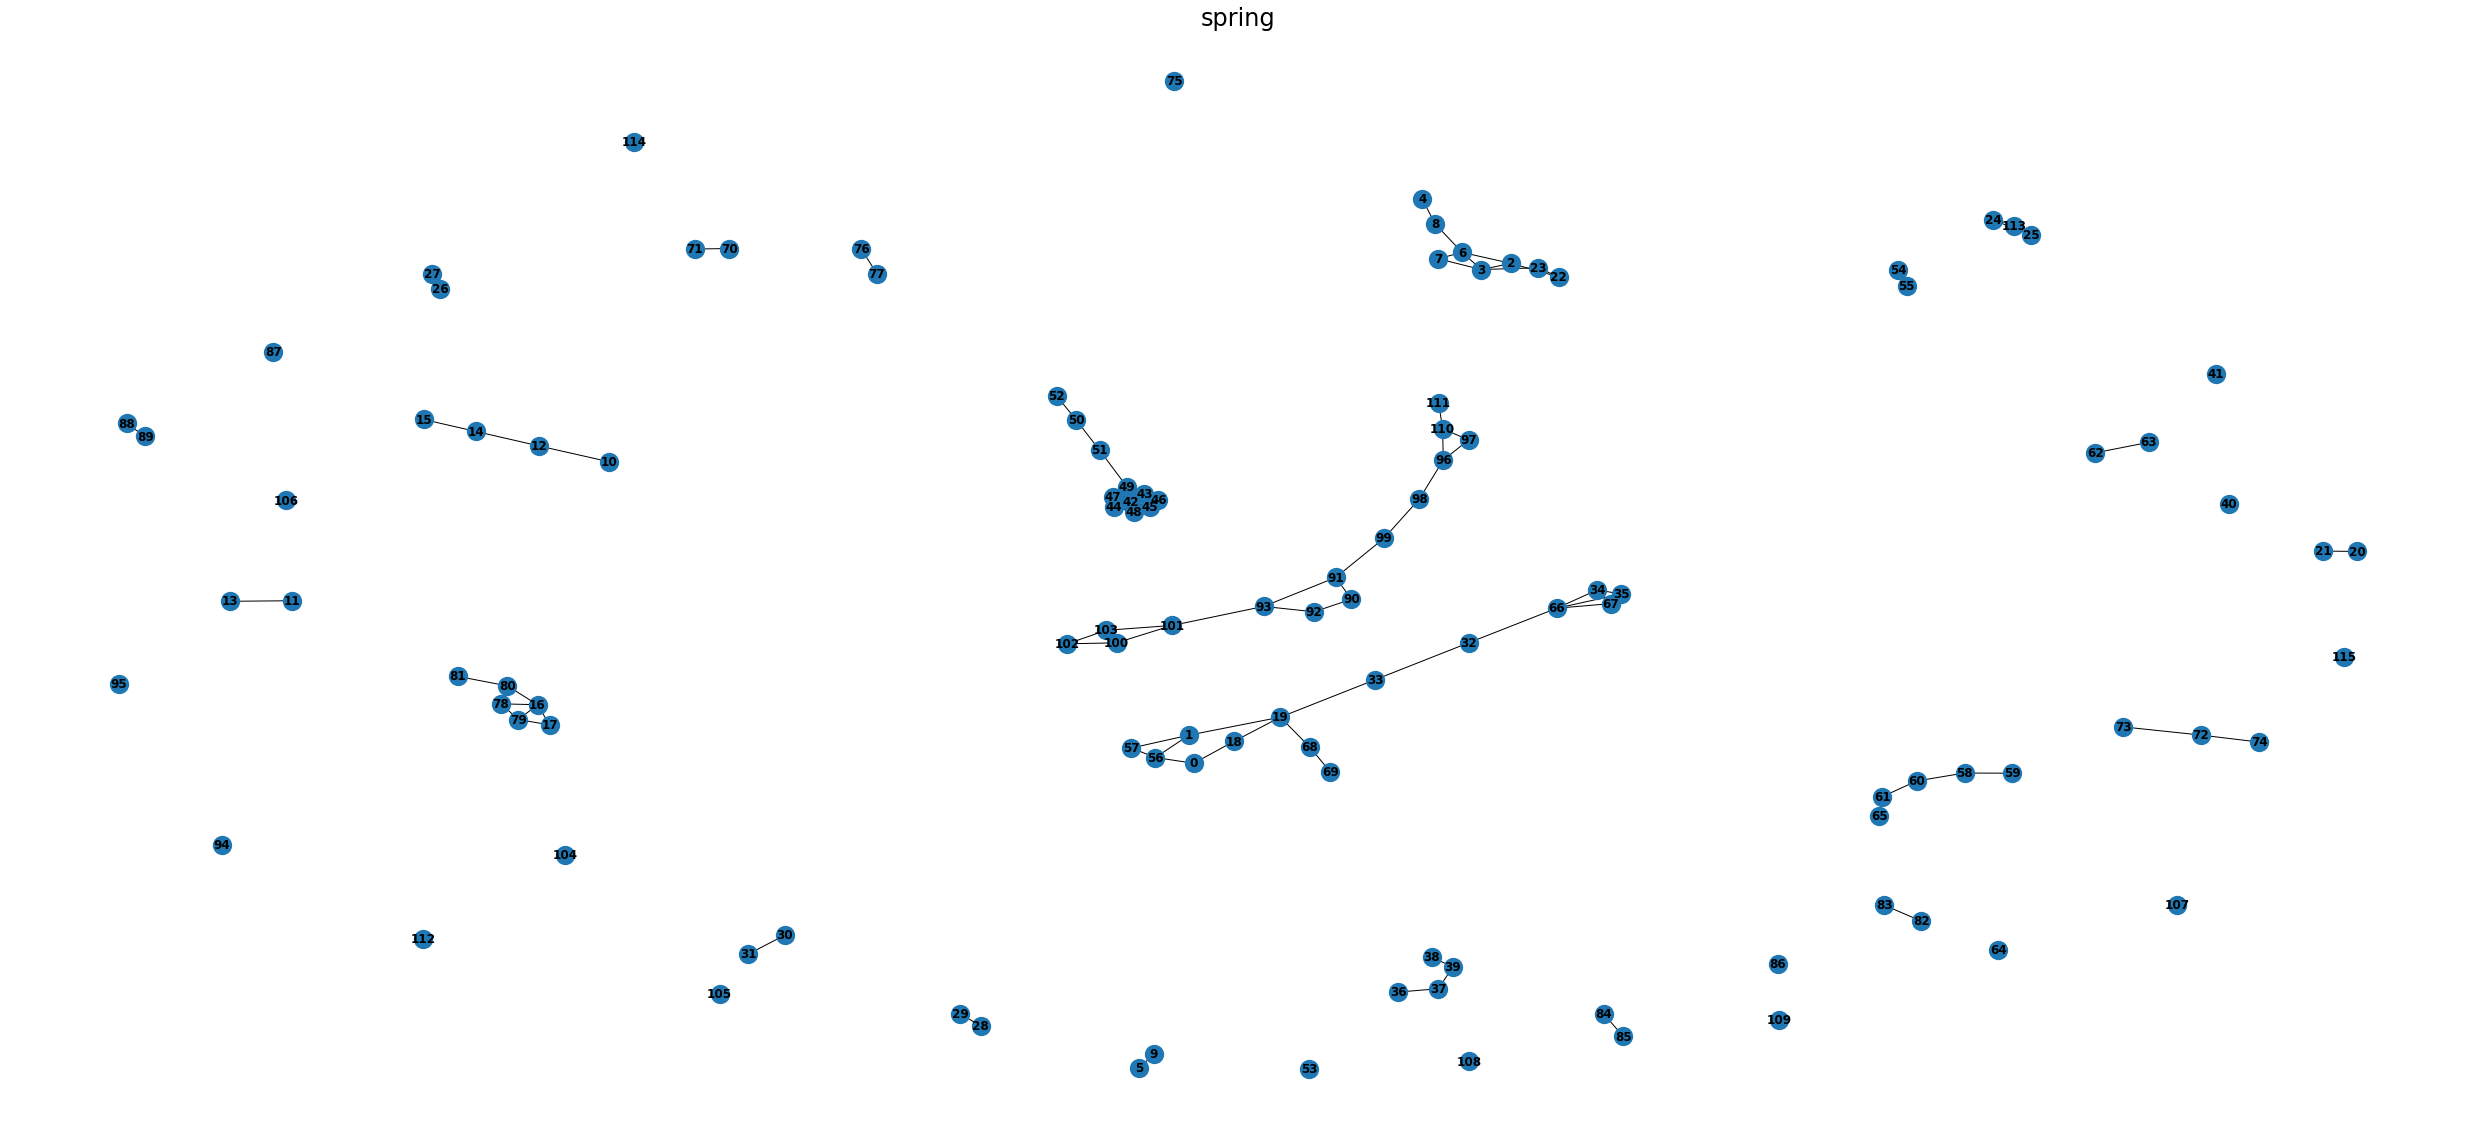

In [88]:
plt.figure(figsize=(150,20))
plt.subplot(131)
G_N3_UMBRAL = nx.from_numpy_matrix(MAT_N3_UMBRAL)
nx.draw(G_N3_UMBRAL, with_labels=True, font_weight='bold')
plt.title('spring')

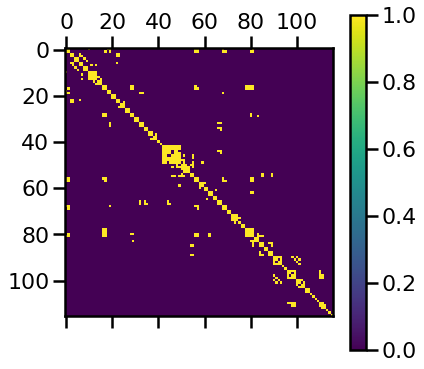

In [89]:
plt.matshow(MAT_W_UMBRAL)
plt.colorbar()

Text(0.5, 1.0, 'spring')

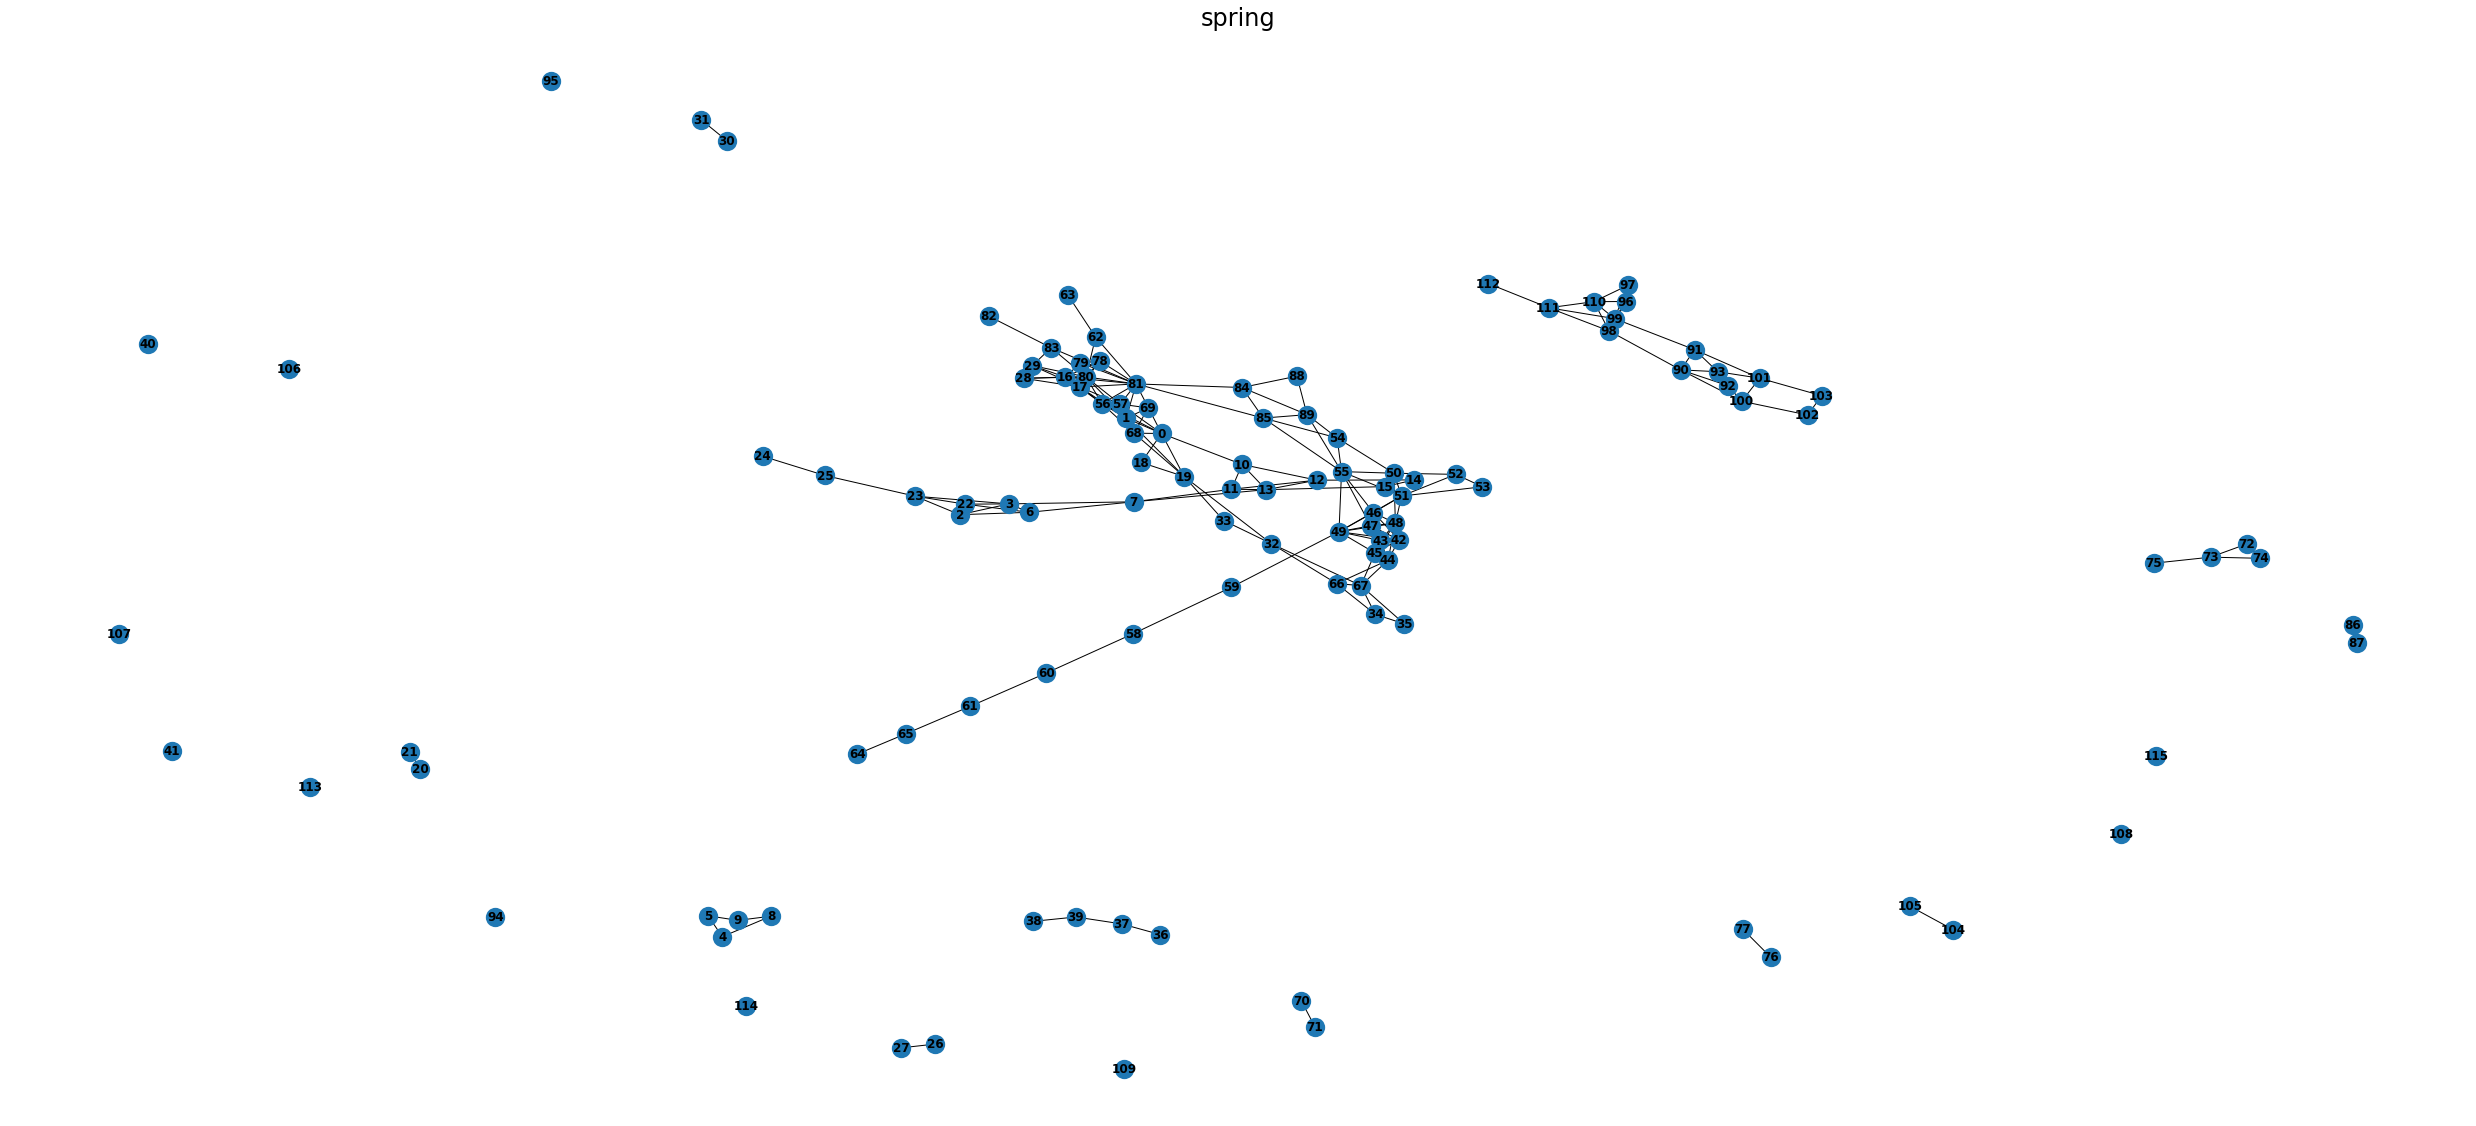

In [90]:
plt.figure(figsize=(150,20))
plt.subplot(131)
G_W_UMBRAL = nx.from_numpy_matrix(MAT_W_UMBRAL)
nx.draw(G_W_UMBRAL, with_labels=True, font_weight='bold')
plt.title('spring')

In [91]:
# coeficiente de clustering total
print(nx.average_clustering(G_N1_UMBRAL))
print(nx.average_clustering(G_N2_UMBRAL))
print(nx.average_clustering(G_N3_UMBRAL))
nx.average_clustering(G_W_UMBRAL)

0.4453955547765164
0.3803662812283501
0.17025862068965514


0.35620926008857046

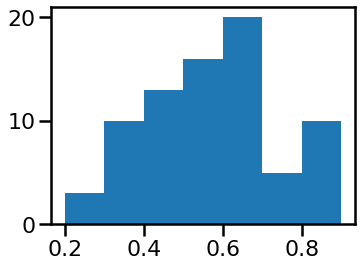

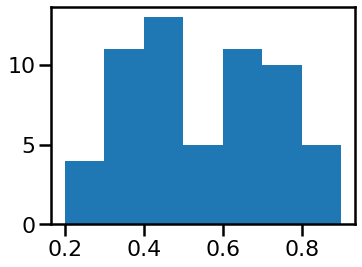

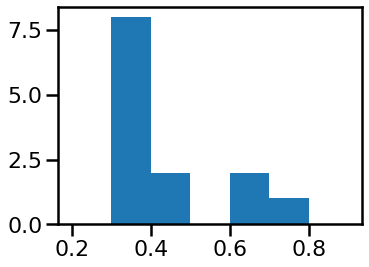

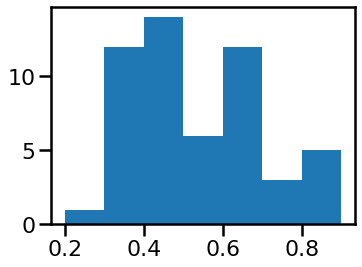

In [92]:
# histograma de coeficientes de cluster (de cada nodo)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_N1_UMBRAL).values(),bins=np.arange(0.2,1,0.1));

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_N2_UMBRAL).values(),bins=np.arange(0.2,1,0.1));

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_N3_UMBRAL).values(),bins=np.arange(0.2,1,0.1));

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_W_UMBRAL).values(),bins=np.arange(0.2,1,0.1));

In [93]:
#grados por nodo
df = pd.DataFrame(G_N1_UMBRAL.degree,columns=['Node','Degree']).set_index('Node')
print(df.T)

# grados totales
df.sort_values('Degree',ascending=False).T

Node    0    1    2    3    4    5    6    ...  109  110  111  112  113  114  115
Degree   23   21   10    7    5    4   12  ...    3    7    7    6    5    4    2

[1 rows x 116 columns]


Node,57,56,81,55,0,1,80,49,48,47,66,17,16,67,45,44,32,58,84,19,54,51,62,50,78,89,42,46,12,11,18,59,69,83,43,79,28,29,6,7,...,86,87,113,92,4,35,30,26,9,61,31,36,37,105,27,64,65,5,72,73,114,21,109,104,20,77,38,76,40,41,94,70,71,74,75,106,107,108,95,115
Degree,30,26,25,24,23,21,21,19,19,19,18,18,17,16,16,16,16,16,15,15,15,15,14,14,14,14,14,13,13,13,13,13,13,13,13,13,13,13,12,12,...,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2


In [94]:
#grados por nodo
df = pd.DataFrame(G_N2_UMBRAL.degree,columns=['Node','Degree']).set_index('Node')
print(df.T)

# grados totales
df.sort_values('Degree',ascending=False).T

Node    0    1    2    3    4    5    6    ...  109  110  111  112  113  114  115
Degree   10   12    9    7    6    4    9  ...    2    5    7    3    3    3    2

[1 rows x 116 columns]


Node,32,33,66,56,17,16,1,47,68,19,45,44,67,69,42,49,81,57,80,0,18,79,46,78,43,90,2,100,28,101,6,48,29,93,22,7,91,83,111,15,...,51,5,65,37,36,55,31,27,71,26,95,104,105,20,112,113,114,21,94,70,53,74,75,76,77,64,54,63,84,86,87,88,89,40,106,107,108,109,41,115
Degree,17,16,13,13,13,13,12,12,11,11,11,11,11,11,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,7,7,...,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2


In [95]:
#grados por nodo
df = pd.DataFrame(G_N3_UMBRAL.degree,columns=['Node','Degree']).set_index('Node')

# print(df.T)

# grados totales
df.sort_values('Degree',ascending=False).T



Node,49,42,44,43,45,46,47,48,66,16,19,6,3,34,56,1,80,67,78,35,79,2,110,93,101,96,91,90,98,103,102,100,99,51,50,97,57,60,61,92,...,27,55,30,54,29,59,28,52,62,63,36,38,65,26,25,24,69,70,71,73,31,114,112,107,108,105,109,113,106,41,104,95,94,87,86,40,75,64,53,115
Degree,10,9,9,9,9,9,9,9,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [96]:
#grados por nodo
df = pd.DataFrame(G_W_UMBRAL.degree,columns=['Node','Degree']).set_index('Node')

# df.T

# grados totales
df.sort_values('Degree',ascending=False).T

Node,81,80,17,49,48,1,56,55,57,47,16,0,51,46,45,44,43,42,68,67,99,19,98,29,79,13,85,50,90,89,110,3,78,7,101,54,10,11,6,12,...,9,53,59,60,5,4,61,104,64,105,20,21,24,112,26,27,30,38,63,70,71,75,31,77,76,82,36,86,87,40,41,106,107,108,109,95,94,113,114,115
Degree,15,14,12,11,11,11,10,10,10,10,10,10,9,9,9,9,9,9,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,...,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2


In [97]:
#comp comparar los grados de los grafos de estadios de sueño
degree_N1 = [d for n, d in G_N1_UMBRAL.degree]
degree_N2 = [d for n, d in G_N2_UMBRAL.degree]
degree_N3 = [d for n, d in G_N3_UMBRAL.degree]
degree_W = [d for n, d in G_W_UMBRAL.degree]

In [98]:
df_todo=pd.DataFrame(list(zip(degree_N1,degree_N2,degree_N3,degree_W)), 
               columns =['N1', 'N2' , 'N3' , 'W']) 

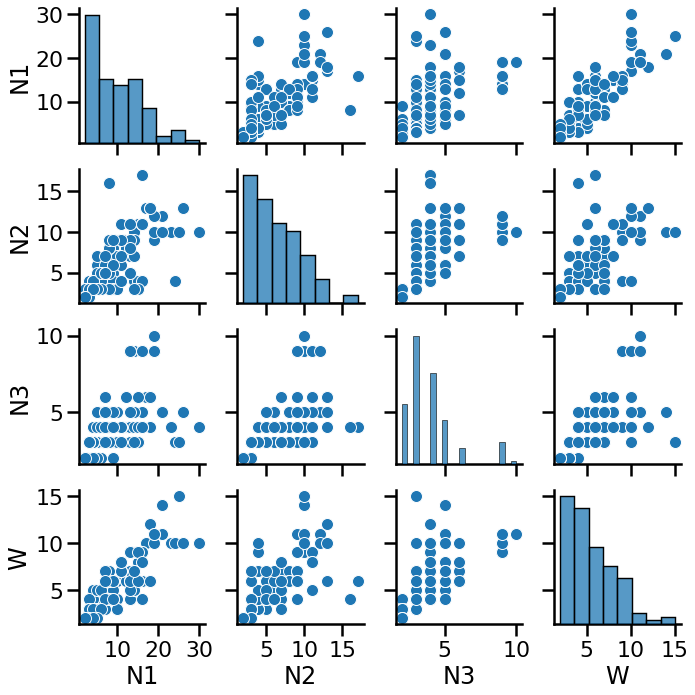

In [99]:
sns.pairplot(df_todo)

In [100]:
df_todo.corr()

,N1,N2,N3,W
N1,1.000000,0.680922,0.502552,0.857389
N2,0.680922,1.000000,0.627541,0.688739
N3,0.502552,0.627541,1.000000,0.641443
W,0.857389,0.688739,0.641443,1.000000


**Medias de centralidad**

Es posible calcular las medias de centralidad:

Grado

Intermediación (betweenness)

Cercanía (Closeness)

Centralidad de autovectores (Eigenvector centrality)

En las salidas siguientes se muestran llamadas a las distintas funciones de centralidad, y se muestran los 10 individuos con valores mayores para cada medida y red.

Text(0.5, 1.0, 'Centralidad de Grado')

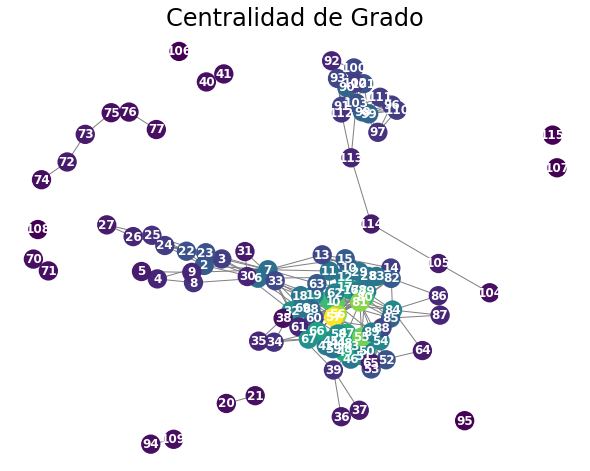

In [101]:
#medidas de centralidad
pos = nx.spring_layout(G_N1_UMBRAL,k=0.2)

centrality = nx.degree_centrality(G_N1_UMBRAL)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_UMBRAL,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Grado')


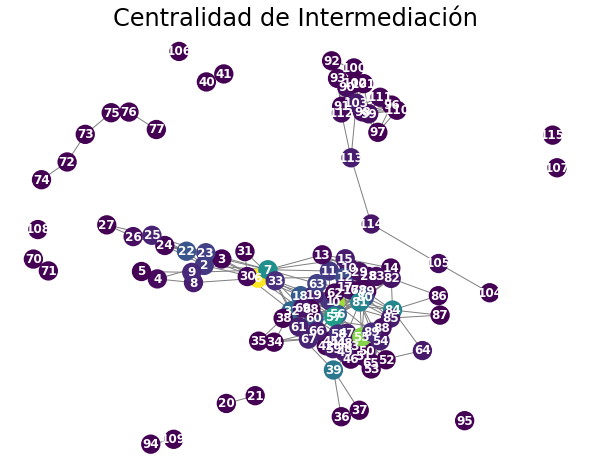

In [102]:
# centralidad de intermediacion
centrality = nx.betweenness_centrality(G_N1_UMBRAL)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_UMBRAL,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Intermediación');

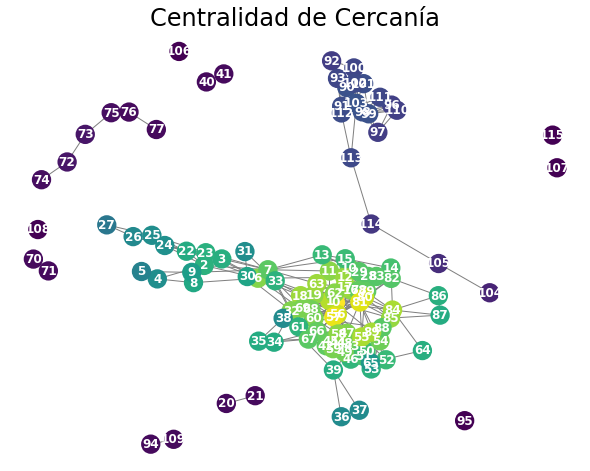

In [103]:
# centralidad de cercania
centrality = nx.closeness_centrality(G_N1_UMBRAL)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_UMBRAL,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Cercanía');

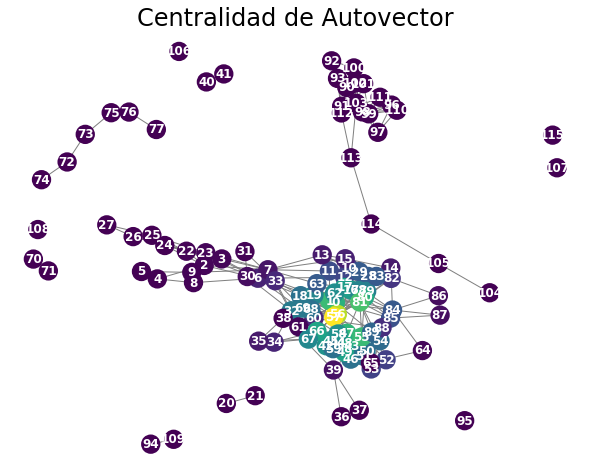

In [104]:
# centralidad de autovector
centrality = nx.eigenvector_centrality(G_N1_UMBRAL)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_UMBRAL,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Autovector');

In [105]:
 #caminos mas cortos

 for C in (G_N1_UMBRAL.subgraph(c).copy() for c in nx.connected_components(G_N1_UMBRAL)):
     print(nx.average_shortest_path_length(C))
 

2.894771894771895
1.0
1.0
1.0
1.6666666666666667
1.0
2.374269005847953
1.0
0
0
0
0
0


### Tarea 2
Comunidades

Louvian
El módulo community usa el método de louvian


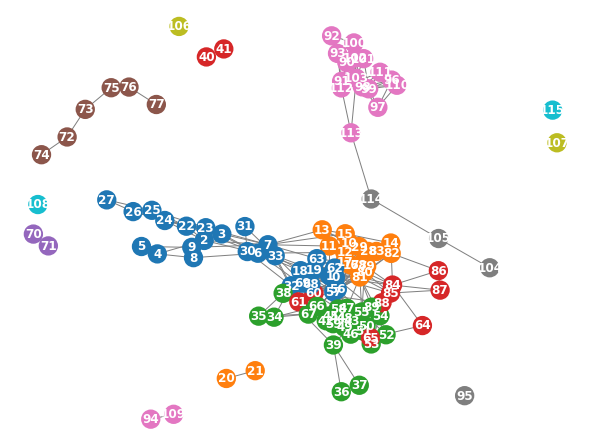

In [106]:
# falta coeficiente de modularidad
# aplicamos  LOUVAIN para un caso de ejemplo
modulos = community.best_partition(G_N1_UMBRAL)
values_obs_N1 = [v for n,v in modulos.items()]
nx.draw(G_N1_UMBRAL,pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs_N1, font_color='white', edge_color='gray')

In [107]:
#Comparamos si las divisiones en comunidades para las dos redes es parecida
# con el indice de RAND
#print("Rand N1, N2:",adjusted_rand_score(values_obs_N1,values_obs_N2))
#print("Rand N1, N3:",adjusted_rand_score(values_obs_N1,values_obs_N3))
#print("Rand N1, W:",adjusted_rand_score(values_obs_N1,values_obs_W))
#print("Rand N2, N3:",adjusted_rand_score(values_obs_N2,values_obs_N3))
#print("Rand N2, W:",adjusted_rand_score(values_obs_N2,values_obs_W))
#print("Rand N3, W:",adjusted_rand_score(values_obs_N3,values_obs_W))


In [108]:
# en R está igraph
import community
import powerlaw

from sklearn.metrics import adjusted_rand_score

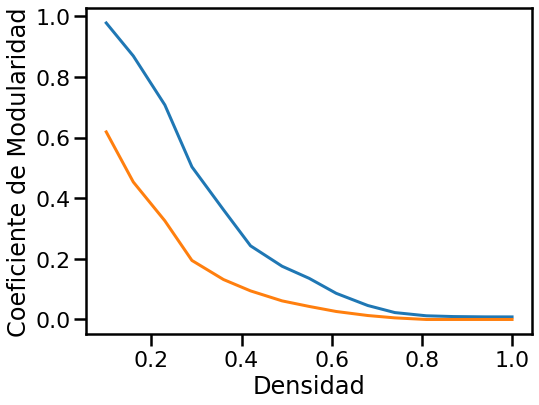

In [109]:
# para distintas densidades
# calculo louvain , y coeficiente de modularidad 
# luego graficamos
# el primero para N1
def Louvain_vs_ER(matriz):

  modularity = []

  for i in np.linspace(0.1, 1, 15):
      d = {}
      # generamos matriz con densidad i
      MAT = calcula_umbral_porcentaje(matriz,i)
      G = nx.from_numpy_matrix(MAT)
      # aplicamos louvain
      partition = community.best_partition(G)
      d['N1_densidad'] = round(i,2)
      d['N1_mod_lou'] = community.modularity(partition, G)

      # hacemos red random conservando igual nro de nodos y aristas  de antes
      G2 = nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())  
      partition2 = community.best_partition(G2)
      d['N1_mod_er'] = community.modularity(partition2, G2)

      modularity.append(d)


  df = pd.DataFrame(modularity)
  #print(df)
  plt.plot(df['N1_densidad'],df['N1_mod_lou']);
  plt.plot(df['N1_densidad'],df['N1_mod_er']);
  plt.xlabel('Densidad')
  plt.ylabel('Coeficiente de Modularidad')
  #idx = np.argmax(modularity)



Louvain_vs_ER(N1_prom)



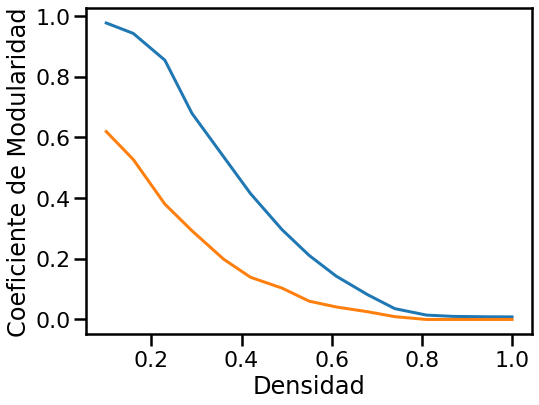

In [110]:
Louvain_vs_ER(N2_prom)


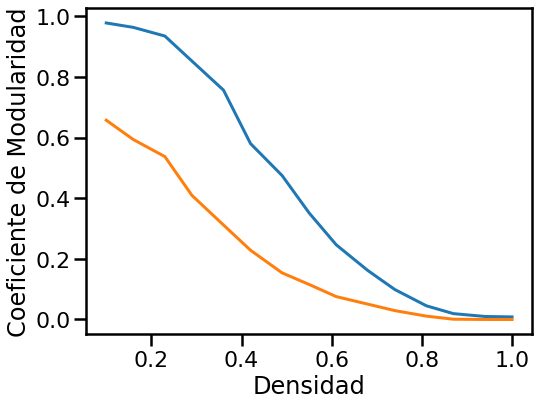

In [111]:
Louvain_vs_ER(N3_prom)

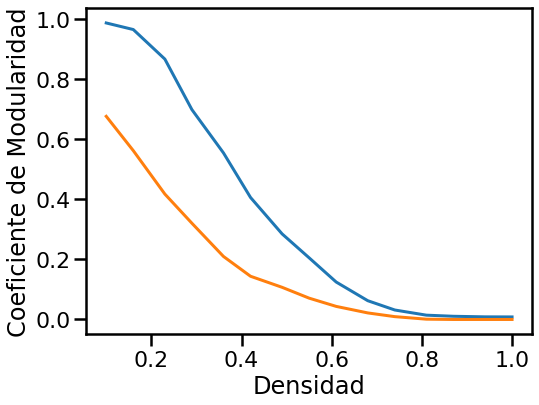

In [112]:
Louvain_vs_ER(W_prom)